# Phase 1 Project

# Project Overview

For this project, I will use exploratory data analysis to generate insights for a business stakeholder.

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 

# Objective
- explore what types of films are currently doing the best at the box office
- translate these findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Dataset 
The data set that I will use in this project:
- imdb.title.basics
-imdb.title.ratings
-bom.movie_gross

# IMDB Movie Analysis

# Importing & Exploring Data

## 1. Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
import operator

## 2. Importing dataset

In [2]:
#loading the data
#tconst column is already a unique identifier so i will make it index col
#I will keep index column in ratings_df so that i can check for duplicates in the tconst column
imdb_df = pd.read_csv('imdb.title.basics.csv.gz', index_col=0)
ratings_df = pd.read_csv('imdb.title.ratings.csv.gz')

## 3. Explore Dataset

In [3]:
#Explore the head of the dataframes
imdb_df.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [4]:
ratings_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [5]:
# Explore shape of the dataframes
imdb_df.shape
print('Number of rows =', imdb_df.shape[0])
print('Number of columns =', imdb_df.shape[1])

Number of rows = 146144
Number of columns = 5


In [6]:
ratings_df.shape
print('Number of rows =', ratings_df.shape[0])
print('Number of columns =', ratings_df.shape[1])

Number of rows = 73856
Number of columns = 3


In [7]:
#Get info of the dataframes
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Data Cleaning

## 1. Checking for missing values

In [9]:
# Check missing values for imdb_df
imdb_df.isnull().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [10]:
#check missing data as a percentage to determine what to do next
imdb_df.isnull().sum()*100/len(imdb_df)

primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

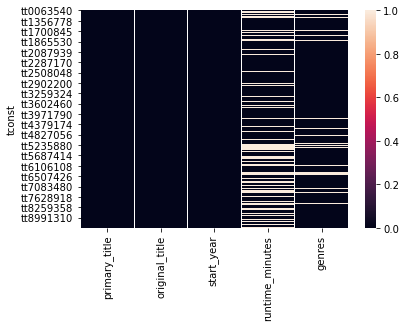

In [11]:
#visualize missing data using heat map
sns.heatmap (imdb_df.isnull())
plt.show()

In [12]:
ratings_df.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [13]:
'''imdb_df has missing values. 
ratings_df has no missing values
'''

'imdb_df has missing values. \nratings_df has no missing values\n'

## 2. Drop missing values

In [14]:
#drop missing values
imdb_df.dropna(axis=0, inplace=True)

In [15]:
#check for the new shape of the dataframe
imdb_df.shape

(112232, 5)

In [16]:
imdb_df.isnull().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

## 3. Checking for duplicated values

In [17]:
#check for duplicates
imdb_df.duplicated().sum()

59

In [18]:
#get an overview of the duplicates
imdb_df[imdb_df.duplicated(keep = False)].head(6)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt10195890,Olanda,Olanda,2019,154.0,Documentary
tt10218948,Aitebaar,Aitebaar,2017,80.0,Comedy
tt10224422,Olanda,Olanda,2019,154.0,Documentary
tt10230622,Aitebaar,Aitebaar,2017,80.0,Comedy
tt10272966,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary
tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary


In [19]:
#drop all duplicates
imdb_df.drop_duplicates(inplace=True)

In [20]:
# Check for duplicates again
imdb_df.duplicated().any()

False

In [21]:
## Check for duplicates in ratings_df
ratings_df.duplicated(subset=['tconst'], keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [22]:
# Get count of duplicates
imdb_df.duplicated().sum()

0

In [23]:
ratings_df.duplicated().sum()

0

In [24]:
#check for duplicates in the tconst column
#tconst would be the main column to check for duplicates
ratings_df.duplicated(['tconst']).any()

False

# Merge datasets

In [25]:
df = imdb_df.merge(ratings_df, how = 'inner', on = 'tconst')

In [26]:
#top 3 rows of the dataframe
df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [27]:
#make tconst the index column
df.set_index('tconst', inplace = True)
df.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [28]:
#check info of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65718 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65718 non-null  object 
 1   original_title   65718 non-null  object 
 2   start_year       65718 non-null  int64  
 3   runtime_minutes  65718 non-null  float64
 4   genres           65718 non-null  object 
 5   averagerating    65718 non-null  float64
 6   numvotes         65718 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


# Explore the overall statistics of the data

In [29]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65718.000000,65718.000000,65718.000000,6.571800e+04
mean,2014.257951,94.732798,6.320857,3.954793e+03
std,2.600095,209.380177,1.458869,3.208872e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [30]:
df.shape

(65718, 7)

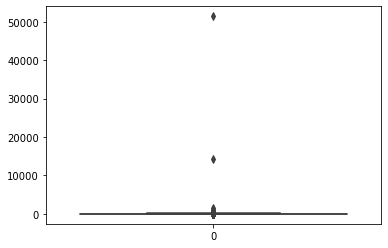

In [31]:
#There seems to be outliers in the runtime_minutes
#Checking for outliers
sns.boxplot(data = df['runtime_minutes'])
plt.show()

In [32]:
'''
There seems to be outliers in the runtime column.
'''

'\nThere seems to be outliers in the runtime column.\n'

In [33]:
#calculating IQR and boundaried at 1.5
Q1 = df['runtime_minutes'].quantile(0.25)
Q3 = df['runtime_minutes'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print('lower limit =', lower_lim)
print('upper limit =', upper_lim)

IQR = 23.0
lower limit = 46.5
upper limit = 138.5


In [34]:
#setting outliers
outliers_low = df['runtime_minutes'] < lower_lim
outliers_up = df['runtime_minutes']  > upper_lim

In [35]:
# find how many rows would need to be dropped
print((len (df['runtime_minutes'][outliers_low])) + (len(df['runtime_minutes'][outliers_up])))

3553


In [36]:
# drop the outliers
outliers = df[outliers_low | outliers_up].index
df.drop(outliers, inplace=True)

In [37]:
#Check for overall statistics again
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,62165.000000,62165.000000,62165.000000,6.216500e+04
mean,2014.253438,91.597249,6.299665,3.586942e+03
std,2.597875,17.681009,1.455091,2.742315e+04
min,2010.000000,47.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.400000,1.600000e+01
50%,2014.000000,90.000000,6.400000,6.100000e+01
75%,2016.000000,102.000000,7.300000,3.390000e+02
max,2019.000000,138.000000,10.000000,1.005960e+06


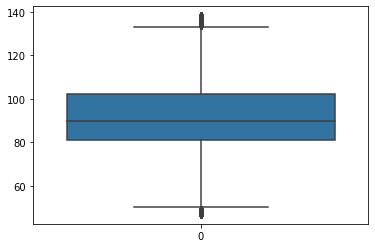

In [38]:
#confirm outliers are dropped with boxplot
sns.boxplot(data = df['runtime_minutes'])
plt.show()

In [39]:
'''
There are no more outliers
'''

'\nThere are no more outliers\n'

In [40]:
#check for new shape of the dataframe
df.shape

(62165, 7)

# Analysis & Visualization

##  1. Movie Production Analysis

In [41]:
#print out columns to easily know which ones i'm working with
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

### a. What is the production of movies over the years?

In [42]:
mov_per_year = df['start_year']
mov_per_year.value_counts()

2016    7350
2017    7292
2015    7266
2014    7128
2013    6829
2012    6507
2011    6206
2018    6198
2010    5707
2019    1682
Name: start_year, dtype: int64

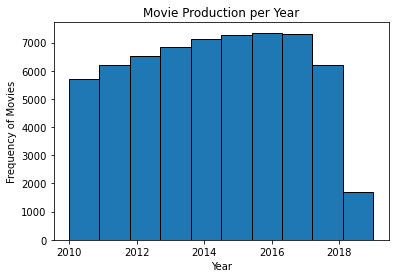

In [43]:
#visualising the movies production over the years
x = mov_per_year
fig, ax = plt.subplots()
ax.hist(x, edgecolor="black")
ax.set_title("Movie Production per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency of Movies");

In [44]:
'''
The production of movies has been increasing over time from 2010 to 2016. 
There was a slight drop in 2017.
The assumption is that the data for 2018 runs for some months in the year
'''

'\nThe production of movies has been increasing over time from 2010 to 2016. \nThere was a slight drop in 2017.\nThe assumption is that the data for 2018 runs for some months in the year\n'

## 2. Analysis by Runtime

In [45]:
#print out columns to easily know which ones i'm working with
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

### a.  Top 10 lengthy movies and runtime

In [46]:
top_movie_runtime = df.nlargest(10,'runtime_minutes')[['primary_title','runtime_minutes']]
top_movie_runtime.set_index('primary_title')

,runtime_minutes
primary_title,
Shutter Island,138.0
Outside the Law,138.0
Fortress of War,138.0
Under the North Star II,138.0
Prince,138.0
Space Battleship Yamato,138.0
The Genesis Code,138.0
The Master,138.0
Persona Beach,138.0


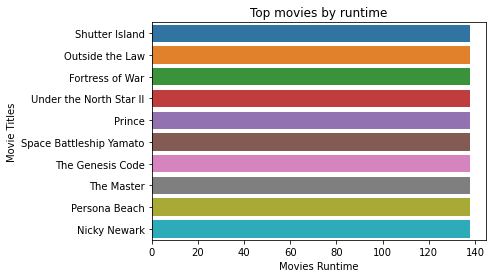

In [47]:
#Visualize the outcome
sns.barplot(x = 'runtime_minutes', y = 'primary_title', data = top_movie_runtime)
plt.xlabel('Movies Runtime')
plt.ylabel('Movie Titles')
plt.title('Top movies by runtime')
plt.show()

In [48]:
'''
The top 10 lengthy movies by runtime seems to have the same amount of runtime, 138 Minutes. 
This is the recommended amount of lengthiest movie by minutes 
'''

'\nThe top 10 lengthy movies by runtime seems to have the same amount of runtime, 138 Minutes. \nThis is the recommended amount of lengthiest movie by minutes \n'

###  b. Trend of movies over the years and runtime

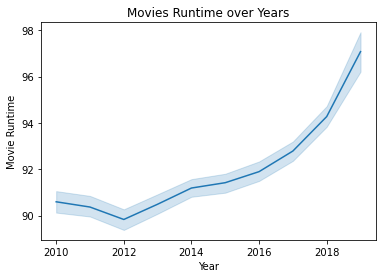

In [49]:
sns.lineplot(data = df, x = 'start_year', y = 'runtime_minutes')
plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Movies Runtime over Years')
plt.show()

In [50]:
'''
The runtime of movies has been increasing over the years from 2012 after they took a dip in the same year
comapred to the previous year.
'''

'\nThe runtime of movies has been increasing over the years from 2012 after they took a dip in the same year\ncomapred to the previous year.\n'

## 3. Analysis by ratings

In [51]:
#print out columns to easily know which ones i'm working with
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes'],
      dtype='object')

### a. What are the top 10 rated movies?

In [52]:
df.sort_values(by = 'averagerating', ascending = False).head(10)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5
tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
tt7259300,Calamity Kevin,Calamity Kevin,2019,77.0,"Adventure,Comedy",10.0,6
tt7227500,Ellis Island: The Making of a Master Race in A...,Ellis Island: The Making of a Master Race in A...,2018,70.0,"Documentary,History",10.0,6
tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8


In [53]:
#Displaying only the movie titles
df.sort_values(by = 'averagerating', ascending = False)['primary_title'].head(10)

tconst
tt8730716                        Pick It Up! - Ska in the '90s
tt5390098                  The Paternal Bond: Barbary Macaques
tt6295832                                Requiem voor een Boom
tt6991826      A Dedicated Life: Phoebe Brand Beyond the Group
tt2632430                                Hercule contre Hermès
tt7259300                                       Calamity Kevin
tt7227500    Ellis Island: The Making of a Master Race in A...
tt1770682                                 Freeing Bernie Baran
tt4960818                                      Revolution Food
tt5089804                      Fly High: Story of the Disc Dog
Name: primary_title, dtype: object

### b. How many movies were made in and before 2014 and have a rating of >= 5

In [54]:
movies_before_2015 = df[(df['start_year'] <= 2014) & (df['averagerating']>=5)].count()
movies_before_2015[0]

26887

### c. How many were made after 2014 and have a rating of >= 5

In [55]:
mov_after_2015 = df[(df['start_year'] > 2014) & (df['averagerating']>=5)].count()
mov_after_2015[0]

24721

### d. What is the average rating by year?

In [56]:
df.groupby('start_year')['averagerating'].mean().sort_values(ascending = False)

start_year
2019    6.637574
2018    6.348015
2017    6.342293
2016    6.300340
2014    6.300253
2012    6.276272
2013    6.275487
2011    6.270416
2010    6.248362
2015    6.245114
Name: averagerating, dtype: float64

### e. Classify movies based on rating and create a new column with the results

Classify as:
- Excellent (7 and above)
- Good (6 and above)
- Average (4 and above)
- Poor ( below 4)

In [57]:
def rating(data):
    if data >= 7:
        return 'Excellent'
    elif data >= 6:
        return 'Good'
    elif data >= 4:
        return 'Average'
    else:
        return 'Poor'

In [58]:
df['ratings_category'] = df['averagerating'].map(rating)
df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratings_category
tconst,,,,,,,,
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Excellent
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Good
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Good
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Excellent
tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,Good


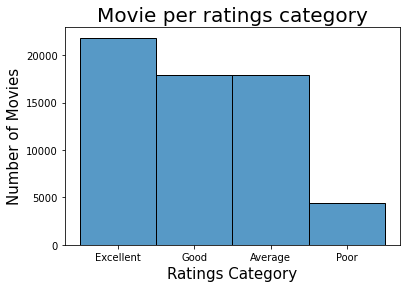

In [59]:
#Visualizing data by the ratings_category
sns.histplot(data = df, x = 'ratings_category',edgecolor="black")
plt.title("Movie per ratings category", fontsize = 20)
plt.xlabel("Ratings Category",fontsize = 15)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show();


In [60]:
'''
Most of the movies rated in the year received an execellent rating. the number of Good and average rated movies are
fairly the same and few movies received poor rating
'''

'\nMost of the movies rated in the year received an execellent rating. the number of Good and average rated movies are\nfairly the same and few movies received poor rating\n'

## 3. Votes

In [61]:
#print out columns to easily know which ones i'm working with
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'ratings_category'],
      dtype='object')

### a. Display the years in order of number of votes

In [62]:
df.groupby('start_year')['numvotes'].sum().sort_values(ascending = False)

start_year
2013    30624262
2011    30269689
2014    29093660
2010    27054430
2012    24847675
2016    23438890
2015    22216960
2017    19223192
2018    13778483
2019     2434980
Name: numvotes, dtype: int64

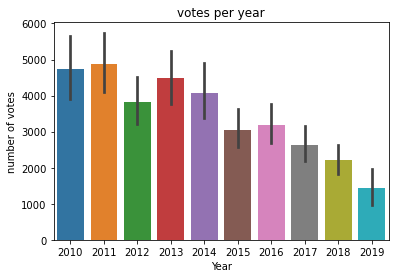

In [63]:
#Visualize the data
sns.barplot(x = 'start_year', y = 'numvotes', data = df)
plt.xlabel('Year')
plt.ylabel('number of votes')
plt.title('votes per year')
plt.show()

In [64]:
'''
Less and less people are voting as the years go by. 
'''

'\nLess and less people are voting as the years go by. \n'

### b. Do more votes equate to high rating?

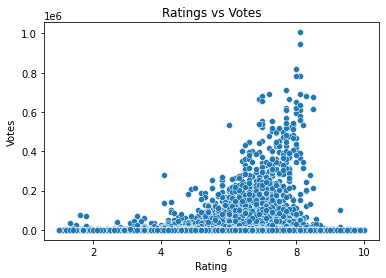

In [65]:
#Plot a scatter diagram to determine correlation between ratings and votes
sns.scatterplot(data = df, x = 'averagerating', y = 'numvotes', palette = 'magma')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Ratings vs Votes')
plt.show()

In [66]:
'''
It is clear that higher rated movies are likely to reeive more votes. People are less likely to vote for movies
that they believe have low ratings
'''

'\nIt is clear that higher rated movies are likely to reeive more votes. People are less likely to vote for movies\nthat they believe have low ratings\n'

## 4. Analysis by Genre

In [67]:
#print out columns to easily know which ones i'm working with
df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'ratings_category'],
      dtype='object')

### a. What uniques genres are there?

In [68]:
#Have a overlook of genre column in dataframe
df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratings_category
tconst,,,,,,,,
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Excellent
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Good
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Good
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Excellent
tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,Good


In [69]:
#create a list of all the genres
genres = []
for data in df['genres']:
    genres.extend(data.split(','))

In [70]:
#append unique genres to new list
unique_genre = []
for data in genres:
    if data not in unique_genre:
        unique_genre.append(data)
print(unique_genre)
print()
print('The number of unique genres is', len(unique_genre))

['Biography', 'Drama', 'Comedy', 'Fantasy', 'Adventure', 'Animation', 'History', 'Documentary', 'Mystery', 'Action', 'Thriller', 'Crime', 'Horror', 'Family', 'Romance', 'Sci-Fi', 'Music', 'War', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult']

The number of unique genres is 25


###  b. Classify number of movies by Genre

In [71]:
#create a dictionary that appends the number of movies per genre
movies_per_genre = Counter(genres)
movies_per_genre

Counter({'Biography': 3496,
         'Drama': 26860,
         'Comedy': 14712,
         'Fantasy': 1875,
         'Adventure': 3424,
         'Animation': 1573,
         'History': 2522,
         'Documentary': 15563,
         'Mystery': 2777,
         'Action': 5509,
         'Thriller': 7218,
         'Crime': 4094,
         'Horror': 6770,
         'Family': 3071,
         'Romance': 5479,
         'Sci-Fi': 1974,
         'Music': 1754,
         'War': 756,
         'Sport': 1036,
         'Western': 249,
         'Musical': 550,
         'News': 548,
         'Reality-TV': 9,
         'Game-Show': 2,
         'Adult': 2})

### c. Visualize the top 10 genres with highest number of movies

In [72]:
#arrange the dictionary from highest to lowest
sorted_d = dict( sorted(movies_per_genre.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_d)

Dictionary in descending order by value :  {'Drama': 26860, 'Documentary': 15563, 'Comedy': 14712, 'Thriller': 7218, 'Horror': 6770, 'Action': 5509, 'Romance': 5479, 'Crime': 4094, 'Biography': 3496, 'Adventure': 3424, 'Family': 3071, 'Mystery': 2777, 'History': 2522, 'Sci-Fi': 1974, 'Fantasy': 1875, 'Music': 1754, 'Animation': 1573, 'Sport': 1036, 'War': 756, 'Musical': 550, 'News': 548, 'Western': 249, 'Reality-TV': 9, 'Game-Show': 2, 'Adult': 2}


In [73]:
#create two lists with top 10 genres with highest movie numbers
data = sorted_d
names = list(data.keys())
values = list(data.values())
top_sum_movies = values[:10]
top_10_genre = names[:10]
print(top_sum_movies)
print(top_10_genre)

[26860, 15563, 14712, 7218, 6770, 5509, 5479, 4094, 3496, 3424]
['Drama', 'Documentary', 'Comedy', 'Thriller', 'Horror', 'Action', 'Romance', 'Crime', 'Biography', 'Adventure']


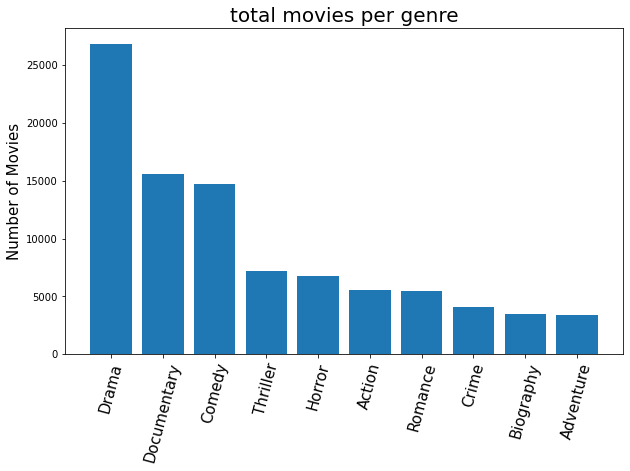

In [74]:
# plot the graph
plt.subplots(figsize=(10, 6))
plt.bar(top_10_genre, top_sum_movies, tick_label=top_10_genre)
plt.title('total movies per genre', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 15)
plt.xticks(rotation = 75, fontsize = 15)
plt.show();

In [75]:
'''
Drama is the most produced genre in movies followed by documentaries. The least produced genre are biographies and 
adventure
'''

'\nDrama is the most produced genre in movies followed by documentaries. The least produced genre are biographies and \nadventure\n'

# BOM Movie Analysis

# Importing & Exploring Data

## 1. Importing data

In [76]:
#load the bom movie data
bom_df = pd.read_csv('bom.movie_gross.csv.gz')

## 2. Explore Dataset

In [77]:
#Explore the head of the dataframe
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [78]:
# Explore shape of the dataframes
bom_df.shape

(3387, 5)

In [79]:
#Get info of the dataframes
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [80]:
#Remove any , in the foreign_gross column
bom_df['foreign_gross'] = [float(str(i).replace(",", "")) for i in bom_df["foreign_gross"]]

In [81]:
#convert foreign_gross into float64
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype('float64')

In [82]:
#Get new info of the dataframes
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


# Data Cleaning

## 1. Checking for missing values

In [83]:
# Check missing values
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [84]:
#check missing data as a percentage to determine what to do next
bom_df.isnull().sum()*100/len(bom_df)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

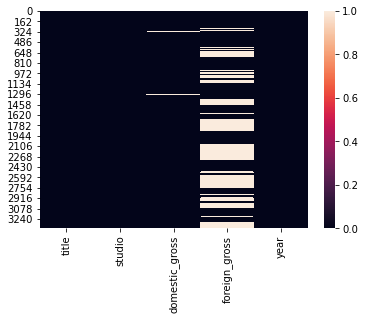

In [85]:
#visualize missing data using heat map
sns.heatmap (bom_df.isnull())
plt.show()

## 2. Drop missing values

In [86]:
# Missing values less than 40% so i will drop them
#drop missing values
bom_df.dropna(axis=0, inplace=True)

In [87]:
#confirm missing values dropped
bom_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [88]:
#check for the new shape of the dataframe
bom_df.shape

(2007, 5)

## 3. Checking for duplicated values

In [89]:
# Check for duplicates 
imdb_df.duplicated().any()

False

In [90]:
# There are no duplicates

# Explore the overall statistics of the data

In [91]:
bom_df.describe()

,domestic_gross,foreign_gross,year
count,2.007000e+03,2.007000e+03,2007.000000
mean,4.701984e+07,7.579038e+07,2013.506228
std,8.162689e+07,1.381796e+08,2.597997
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.700000e+05,3.900000e+06,2011.000000
50%,1.670000e+07,1.940000e+07,2013.000000
75%,5.605000e+07,7.595000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


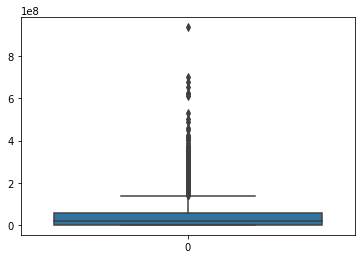

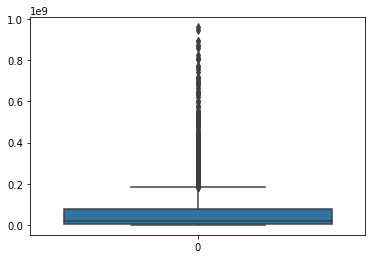

In [92]:
#Plot boxplots to check for outliers
sns.boxplot(data = bom_df['domestic_gross'])
plt.show()
sns.boxplot(data = bom_df['foreign_gross'])
plt.show()

In [93]:
'''
There are outliers in both the domestic and foreign gross columns
'''

'\nThere are outliers in both the domestic and foreign gross columns\n'

In [94]:
#calculating IQR and boundaried at 1.5 for domestic_gross
Q1 = bom_df['domestic_gross'].quantile(0.25)
Q3 = bom_df['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print('lower limit =', lower_lim)
print('upper limit =', upper_lim)

IQR = 55380000.0
lower limit = -82400000.0
upper limit = 139120000.0


In [95]:
# setting outliers
outliers_low = bom_df['domestic_gross'] < lower_lim
outliers_up = bom_df['domestic_gross']  > upper_lim

In [96]:
# find how many rows would need to be dropped
print((len (bom_df['domestic_gross'][outliers_low])) + (len(bom_df['domestic_gross'][outliers_up])))

181


In [97]:
#dropping outliers
outliers = bom_df[outliers_low | outliers_up].index
bom_df.drop(outliers, inplace=True)

In [98]:
bom_df.shape

(1826, 5)

In [99]:
#calculating IQR and boundaried at 1.5 for foreign_gross
Q1 = bom_df['foreign_gross'].quantile(0.25)
Q3 = bom_df['foreign_gross'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
print('lower limit =', lower_lim)
print('upper limit =', upper_lim)

IQR = 50150000.0
lower limit = -72025000.0
upper limit = 128575000.0


In [100]:
# setting outliers
outliers_low = bom_df['foreign_gross'] < lower_lim
outliers_up = bom_df['foreign_gross']  > upper_lim

In [101]:
# find how many rows would need to be dropped
print((len (bom_df['foreign_gross'][outliers_low])) + (len(bom_df['foreign_gross'][outliers_up])))

171


In [102]:
#dropping outliers
outliers = bom_df[outliers_low | outliers_up].index
bom_df.drop(outliers, inplace=True)

In [103]:
bom_df.shape

(1655, 5)

# Merge datasets 

In [104]:
#rename bom_df column
bom_df.rename(columns = {'title': 'primary_title'}, inplace = True)

In [105]:
bom_df = df.merge(bom_df, how = 'inner', on = 'primary_title')
bom_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratings_category,studio,domestic_gross,foreign_gross,year
0,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Good,IFC,744000.0,8000000.0,2012
1,On the Road,On the Road,2014,89.0,Drama,6.0,6,Good,IFC,744000.0,8000000.0,2012
2,On the Road,On the Road,2016,121.0,Drama,5.7,127,Average,IFC,744000.0,8000000.0,2012
3,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Good,Uni.,26300000.0,26900000.0,2014
4,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Good,Fox,110800000.0,124800000.0,2015


In [106]:
bom_df.shape

(1353, 12)

# Analysis & Visualization

In [107]:
#print out columns to easily know which ones i'm working with
bom_df.columns

Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'ratings_category', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

## 1. Revenue Analysis

###  a. What are the top 10 movies, studio, genre and domestic gross with the highest domestic gross?

In [108]:
top_10_dom = bom_df.nlargest(10,'domestic_gross')[['primary_title', 'studio', 'genres', 'domestic_gross']]
top_10_dom.set_index('primary_title')

,studio,genres,domestic_gross
primary_title,,,
21 Jump Street,Sony,"Action,Comedy,Crime",138400000.0
Argo,WB,"Biography,Drama,Thriller",136000000.0
Ride Along,Uni.,"Action,Comedy,Crime",134900000.0
Ride Along,Uni.,Action,134900000.0
Identity Thief,Uni.,"Adventure,Comedy,Crime",134500000.0
Grown Ups 2,Sony,Comedy,133699999.0
Silver Linings Playbook,Wein.,"Comedy,Drama,Romance",132100000.0
The Peanuts Movie,Fox,"Adventure,Animation,Comedy",130199999.0
Into the Woods,BV,"Adventure,Comedy,Drama",128000000.0


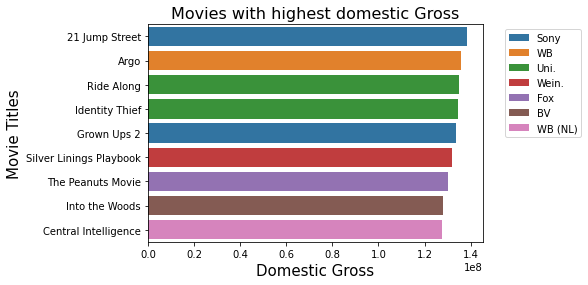

In [109]:
# Graph the results
sns.barplot(data = top_10_dom, x = 'domestic_gross', y = 'primary_title', hue = 'studio', dodge = False)
plt.title('Movies with highest domestic Gross', fontsize = 16)
plt.xlabel('Domestic Gross', fontsize = 15)
plt.ylabel('Movie Titles', fontsize = 15)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2)
plt.show();

###  b. What are the top 10 movies, studio, genre and foreign gross with the highest foreign gross?

In [110]:
top_10_for = bom_df.nlargest(10,'foreign_gross')[['primary_title', 'studio', 'genres', 'foreign_gross']]
top_10_for.set_index('primary_title')

,studio,genres,foreign_gross
primary_title,,,
The Social Network,Sony,"Biography,Drama",128000000.0
The BFG,BV,"Adventure,Family,Fantasy",127900000.0
The Secret World of Arrietty,BV,"Adventure,Animation,Family",126400000.0
Wolf Totem,Sony,"Adventure,Drama",125600000.0
Spy,Fox,"Action,Crime,Drama",124800000.0
Spy,Fox,"Action,Comedy,Crime",124800000.0
Eat Pray Love,Sony,"Drama,Romance",124000000.0
Rango,Par.,"Adventure,Animation,Comedy",122200000.0
Dragon Blade,LGP,"Action,Adventure,Drama",121500000.0


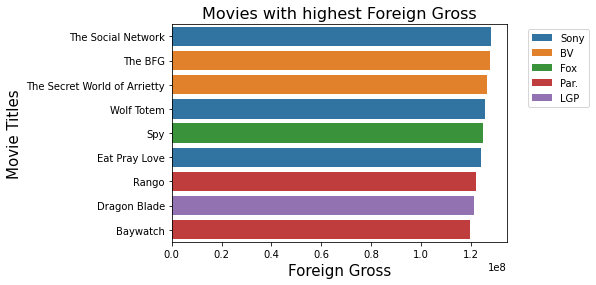

In [111]:
# Graph the results
sns.barplot(data = top_10_for, x = 'foreign_gross', y = 'primary_title', hue = 'studio', dodge = False)
plt.title('Movies with highest Foreign Gross', fontsize = 16)
plt.xlabel('Foreign Gross', fontsize = 15)
plt.ylabel('Movie Titles', fontsize = 15)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2)
plt.show();

###  c. does a movie have high foreign gross if domestic gross is high?

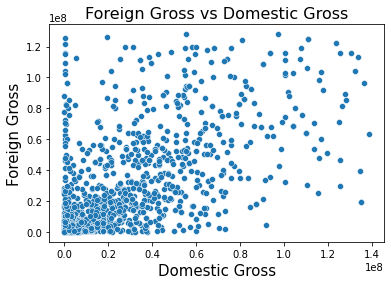

In [112]:
sns.scatterplot(x = 'domestic_gross', y = 'foreign_gross', data = bom_df )
plt.title('Foreign Gross vs Domestic Gross', fontsize = 16)
plt.xlabel('Domestic Gross', fontsize = 15)
plt.ylabel('Foreign Gross', fontsize = 15)
plt.show();

###  d. does a movie have high domestic gross if foreign gross is high?

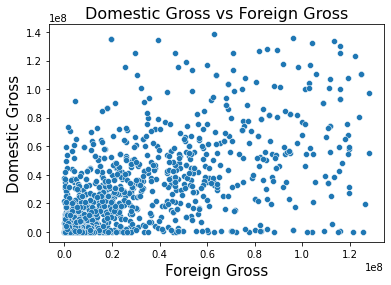

In [113]:
sns.scatterplot(x = 'foreign_gross', y = 'domestic_gross', data = bom_df )
plt.title('Domestic Gross vs Foreign Gross', fontsize = 16)
plt.xlabel('Foreign Gross', fontsize = 15)
plt.ylabel('Domestic Gross', fontsize = 15)
plt.show();

###  e. What's the correlation between ratings and revenue

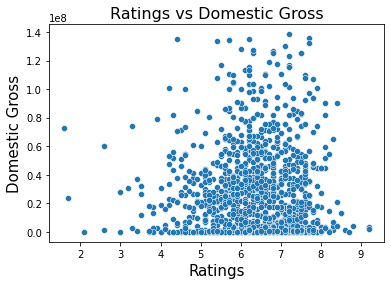

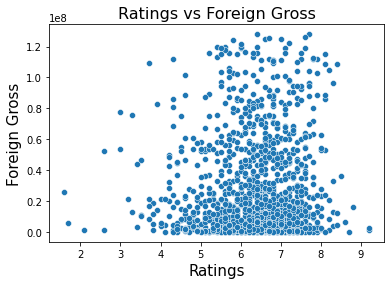

In [114]:
sns.scatterplot(x = 'averagerating', y = 'domestic_gross', data = bom_df)
plt.title('Ratings vs Domestic Gross', fontsize = 16)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Domestic Gross', fontsize = 15)
plt.show();
sns.scatterplot(x = 'averagerating', y = 'foreign_gross', data = bom_df)
plt.title('Ratings vs Foreign Gross', fontsize = 16)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Foreign Gross', fontsize = 15)
plt.show();

###  f. Display genres by average revenue

In [115]:
#get the mean revenue and group it
genre_mean_dom = bom_df.groupby('genres')['domestic_gross'].mean()
genre_mean_for = bom_df.groupby('genres')['foreign_gross'].mean()

#make it into a dataframe
genre_dom_df = pd.DataFrame(genre_mean_dom)
genre_for_df = pd.DataFrame(genre_mean_for)
#reset index
genre_dom_df.reset_index(drop = False, inplace = True)
genre_for_df.reset_index(drop = False, inplace = True)
#group multiple genres rows on genre column into one name
genre_dom_df.loc[genre_dom_df['genres'].str.contains(','),'genres'] = 'multiple genres'
genre_for_df.loc[genre_for_df['genres'].str.contains(','),'genres'] = 'multiple genres'

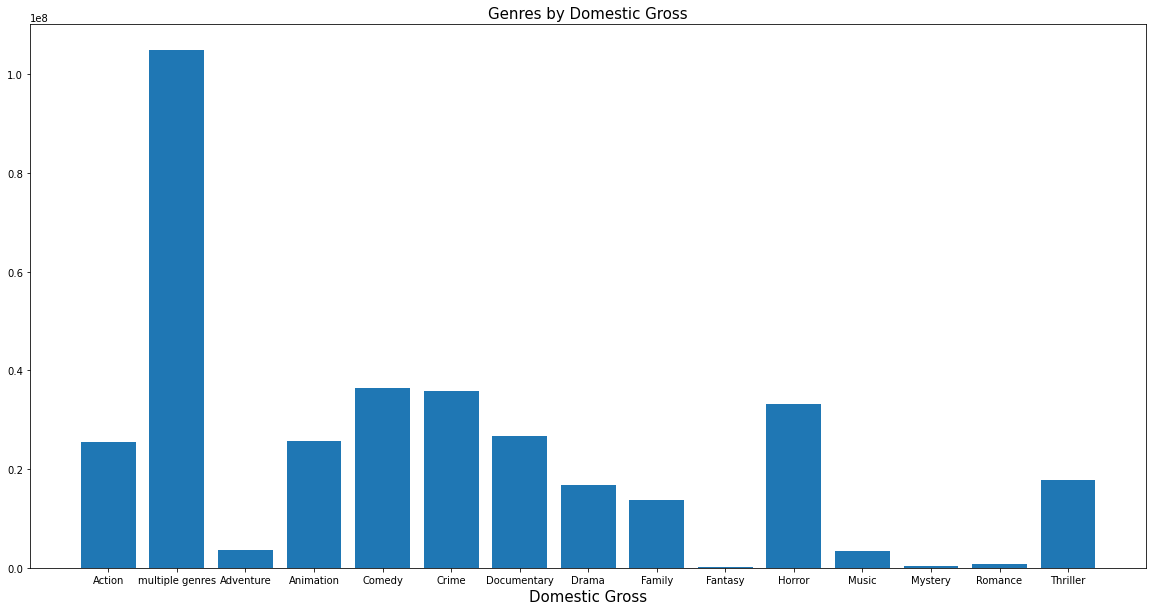

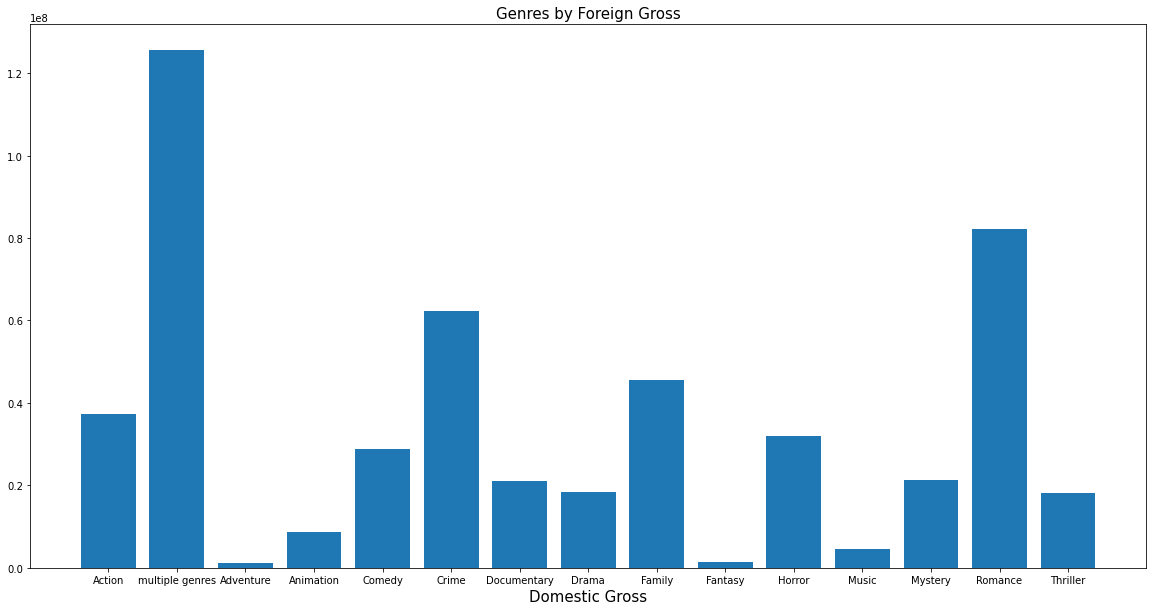

In [116]:
fig, ax1 = plt.subplots(figsize=(20, 10))
fig, ax2 = plt.subplots(figsize=(20, 10))
data1 = genre_dom_df
data2 = genre_for_df
ax1.bar(data1['genres'], data1['domestic_gross'])
ax2.bar(data2['genres'], data2['foreign_gross'])
ax1.set_title('Genres by Domestic Gross', fontsize = 15)
ax2.set_title('Genres by Foreign Gross', fontsize = 15)
ax1.set_xlabel('Genres', fontsize = 15)
ax2.set_xlabel('Genres', fontsize = 15)
ax1.set_xlabel('Domestic Gross', fontsize = 15)
ax2.set_xlabel('Domestic Gross', fontsize = 15)
plt.show()

In [117]:
'''
Movies that have multiple genres within them get the most revenue
'''

'\nMovies that have multiple genres within them get the most revenue\n'

# Conclusion

Learnings:
- the best entry market movies for high revenue are multiple genre movies
- the lengthiest movies should have a maximum of 138 minutes
- the more votes a movie receives the higher the chances it will have a high rating
- a movie can have high revenue domestically or foreign but not necessarily in both